In [1]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

###### Data Preprocessing

In [2]:
# set data dir
data_dir = '../dataset'

In [3]:
os.listdir(data_dir)

['single_prediction', 'test_set', 'training_set']

In [4]:
# set train/test/single_prediction path
train_dir = f'{data_dir}\\training_set'
test_dir = f'{data_dir}\\test_set'
single_pred_dir = f'{data_dir}\\single_prediction'

In [5]:
os.listdir(test_dir)

['cats', 'dogs']

In [6]:
os.listdir(train_dir)

['cats', 'dogs']

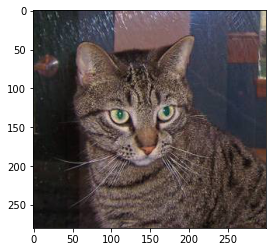

In [7]:
# Visualize an image of cat
first_cat_img = train_dir+'\\cats\\cat.1.jpg'
plt.imshow(imread(first_cat_img))

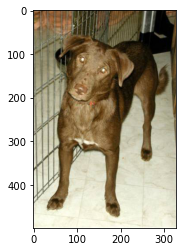

In [8]:
# Visualize an image of dog
first_dog_img = train_dir+'\\dogs\\dog.1.jpg'
plt.imshow(imread(first_dog_img))

In [9]:
# Length of cat images - trainset
len(os.listdir(train_dir+'\\cats'))

4000

In [10]:
# Length of dog images - trainset
len(os.listdir(train_dir+'\\dogs'))

4000

In [11]:
# Length of cat images - testset
len(os.listdir(test_dir+'\\cats'))

1000

In [12]:
# Length of dog images - testset
len(os.listdir(test_dir+'\\dogs'))

1000

In [43]:
# Find the avarage shape of images
def find_dim(path_1,path_2):
    dim1 = []
    dim2 = []
    
    for image_filename in os.listdir(path_1+'\\'+path_2):
        img = imread(path_1+'\\'+path_2+'\\'+image_filename)
        d1,d2,c = img.shape
        
        dim1.append(d1)
        dim2.append(d2)
    
    return dim1,dim2

In [44]:
# cat images on trainset
dim1, dim2 = find_dim(train_dir,'cats')

In [45]:
np.min(dim1),np.max(dim1),np.mean(dim1)

(41, 768, 356.09925)

In [46]:
np.min(dim2),np.max(dim2),np.mean(dim2)

(59, 1023, 409.61975)

In [47]:
# dog images on trainset
dim1, dim2 = find_dim(train_dir,'dogs')

In [48]:
np.min(dim1),np.max(dim1),np.mean(dim1)

(45, 702, 364.84475)

In [49]:
np.min(dim2),np.max(dim2),np.mean(dim2)

(57, 1050, 397.98225)

In [50]:
# cat images on testset
dim1, dim2 = find_dim(test_dir,'cats')

In [51]:
np.min(dim1),np.max(dim1),np.mean(dim1)

(39, 500, 356.267)

In [52]:
np.min(dim2),np.max(dim2),np.mean(dim2)

(59, 500, 413.064)

In [53]:
# dog images on testset
dim1, dim2 = find_dim(test_dir,'dogs')

In [54]:
np.min(dim1),np.max(dim1),np.mean(dim1)

(33, 500, 365.171)

In [55]:
np.min(dim2),np.max(dim2),np.mean(dim2)

(92, 500, 396.317)

In [13]:
# Custom shape
input_shape = (64,64,3)

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
# Traning data generator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

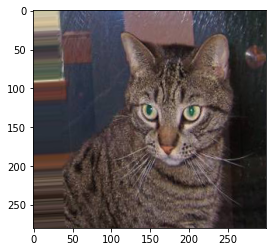

In [16]:
# Randomly transform a single image
plt.imshow(train_datagen.random_transform(imread(first_cat_img)))

In [17]:
# Generating the training set
training_set = train_datagen.flow_from_directory(
    train_dir,
    target_size=input_shape[:2],
    batch_size=32,
    color_mode='rgb',
    class_mode='binary')

Found 8000 images belonging to 2 classes.


In [18]:
# Test data generator
test_datagen = ImageDataGenerator(rescale=1./255)

In [19]:
# Generating the test set
test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=input_shape[:2],
    batch_size=32,
    color_mode='rgb',
    class_mode='binary',
    shuffle=False)

Found 2000 images belonging to 2 classes.


In [20]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

###### Building The Model

In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop, SGD, Adam

In [116]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.25))

model.add(Dense(1, activation="sigmoid"))

In [117]:
# Compiling the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [118]:
# Summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
batch_normalization_24 (Batc (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_25 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_26 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 32)       

In [119]:
# Implement Early Stoping
from tensorflow.keras.callbacks import EarlyStopping

In [120]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

###### Train/Evaluate The Model

In [121]:
model.fit(x=training_set, validation_data=test_set, epochs=35)

Epoch 1/35
250/250 [==============================] - 127s 501ms/step - loss: 0.7127 - accuracy: 0.6062 - val_loss: 1.2274 - val_accuracy: 0.5000
Epoch 2/35
250/250 [==============================] - 127s 509ms/step - loss: 0.6287 - accuracy: 0.6675 - val_loss: 0.6305 - val_accuracy: 0.6730
Epoch 3/35
250/250 [==============================] - 127s 508ms/step - loss: 0.5855 - accuracy: 0.6874 - val_loss: 0.5591 - val_accuracy: 0.7240
Epoch 4/35
250/250 [==============================] - 128s 514ms/step - loss: 0.5625 - accuracy: 0.7111 - val_loss: 0.5517 - val_accuracy: 0.7330
Epoch 5/35
250/250 [==============================] - 128s 511ms/step - loss: 0.5447 - accuracy: 0.7229 - val_loss: 0.5537 - val_accuracy: 0.7300
Epoch 6/35
250/250 [==============================] - 127s 509ms/step - loss: 0.5279 - accuracy: 0.7386 - val_loss: 0.5892 - val_accuracy: 0.7215
Epoch 7/35
250/250 [==============================] - 120s 480ms/step - loss: 0.5248 - accuracy: 0.7333 - val_loss: 0.5649 -

In [122]:
import pandas as pd
from tensorflow.keras.models import load_model

In [123]:
# Metrics as dataframe
metrics = pd.DataFrame(model.history.history)

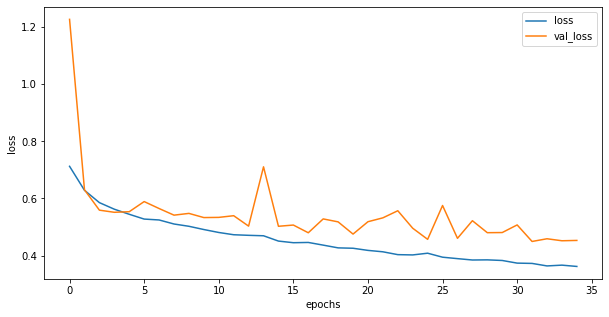

In [126]:
# loss vs val_loss
metrics[['loss','val_loss']].plot(figsize=(10,5))
plt.xlabel('epochs')
plt.ylabel('loss')

plt.savefig('losses-9.png',dpi=200)

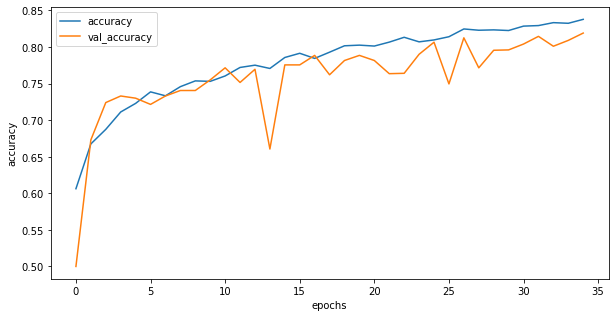

In [127]:
# loss vs val_loss
metrics[['accuracy','val_accuracy']].plot(figsize=(10,5))
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.savefig('accuracy-9.png',dpi=200)

In [128]:
# Evaluate the model
model.evaluate(test_set, verbose=0)

[0.45310890674591064, 0.8190000057220459]

###### Save/Load the model

In [129]:
model.save('cat_dog_classifier_9.h5')

In [130]:
model = load_model('./cat_dog_classifier_9.h5')

In [131]:
# model.evaluate(test_set, verbose=0)

###### Make Prediction/Error Analysis

In [132]:
pred = model.predict(test_set)

In [133]:
pred

array([[0.9277936 ],
       [0.71425414],
       [0.03048012],
       ...,
       [0.0279505 ],
       [0.76370025],
       [0.9874288 ]], dtype=float32)

In [134]:
pred = (pred > 0.5).astype('int32')

In [135]:
pred

array([[1],
       [1],
       [0],
       ...,
       [0],
       [1],
       [1]])

In [136]:
from sklearn.metrics import classification_report,confusion_matrix

In [137]:
print(classification_report(test_set.classes,pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1000
           1       0.80      0.84      0.82      1000

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000



In [138]:
print(confusion_matrix(test_set.classes,pred))

[[796 204]
 [158 842]]


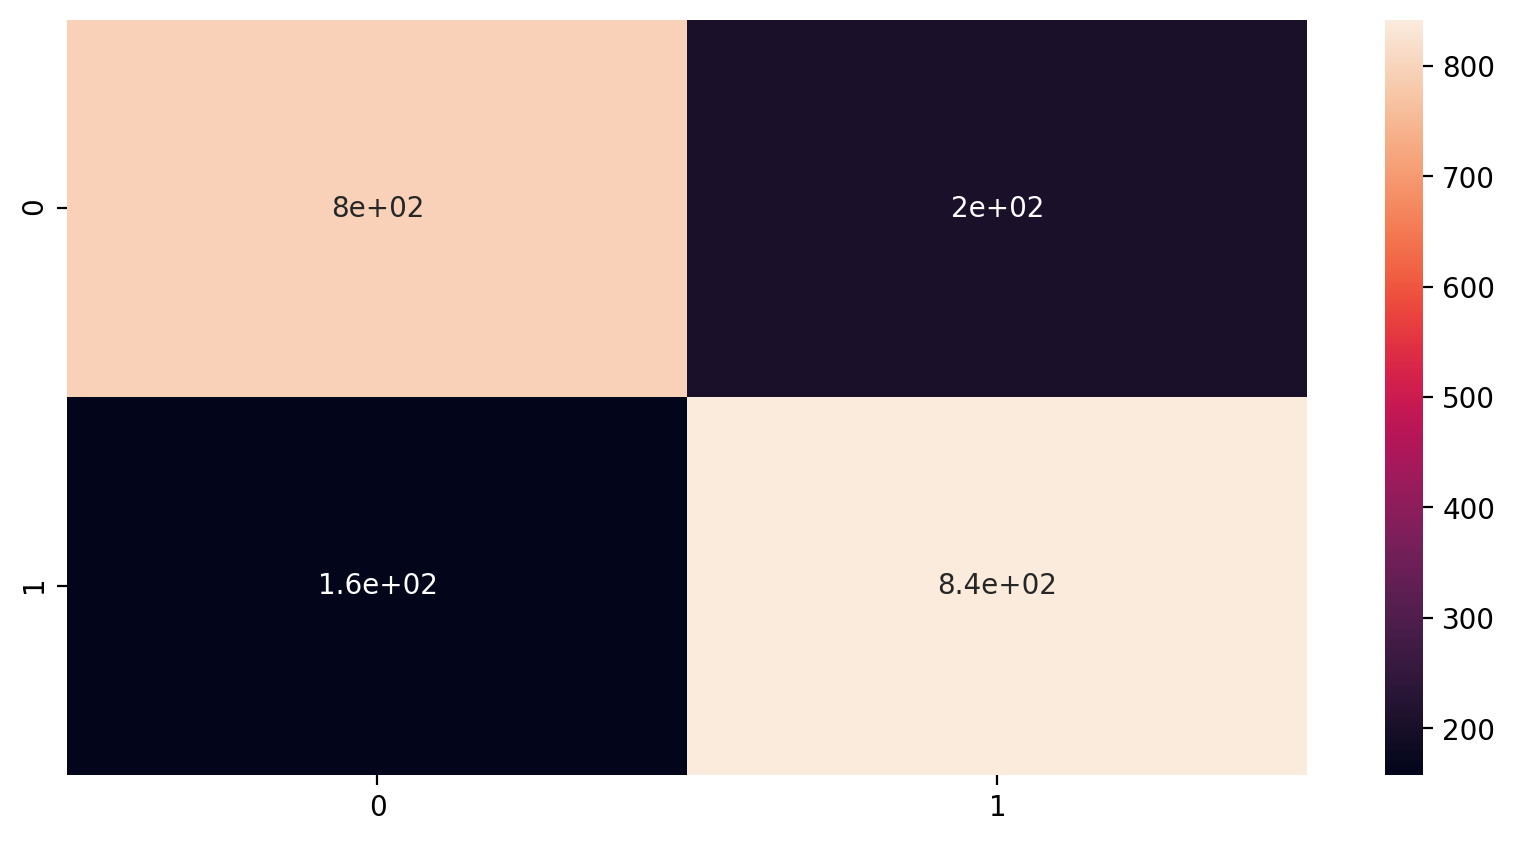

In [139]:
plt.figure(figsize=(10,5), dpi=200)
sns.heatmap(data=confusion_matrix(test_set.classes,pred), annot=True)
plt.savefig('heatmap-9.png')

###### Single Image Prediction

In [140]:
os.listdir(single_pred_dir)

['cat_or_dog_1.jpg',
 'cat_or_dog_2.jpg',
 'cat_or_dog_3.jpg',
 'cat_or_dog_4.jpg']

In [141]:
path_to_image_1 = single_pred_dir+'\\cat_or_dog_3.jpg'
path_to_image_2 = single_pred_dir+'\\cat_or_dog_4.jpg'

In [142]:
from tensorflow.keras.preprocessing import image

In [143]:
# Load images as Pillow format
img1 = image.load_img(path_to_image_1, target_size=input_shape[:2])
img2 = image.load_img(path_to_image_2, target_size=input_shape[:2])

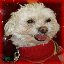

In [144]:
img1

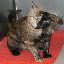

In [145]:
img2

In [146]:
# PILL to Array
img1_to_array = np.expand_dims(image.img_to_array(img1),axis=0)
img2_to_array = np.expand_dims(image.img_to_array(img2),axis=0)

In [147]:
img1_to_array.shape

(1, 64, 64, 3)

In [148]:
img2_to_array.shape

(1, 64, 64, 3)

In [172]:
def make_pred(model, img):
    result = model.predict(img)
    if result > 0.5:
        return "It's a dog"
    else:
        return "It's a cat"

In [150]:
make_pred(model, img1_to_array)

"It's a dog"

In [151]:
make_pred(model, img2_to_array)

"It's a dog"

###### Make prediction with a few complex images

In [152]:
data_dir = '../complex-images'

In [153]:
os.listdir(data_dir)

['image_1.jpg', 'image_2.jpg', 'image_3.jpg', 'image_4.jpg']

In [155]:
path_img_1 = data_dir+'\\image_1.jpg'
path_img_2 = data_dir+'\\image_2.jpg'
path_img_3 = data_dir+'\\image_3.jpg'
path_img_4 = data_dir+'\\image_4.jpg'

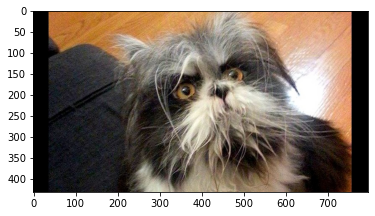

In [160]:
plt.imshow(imread(path_img_1))

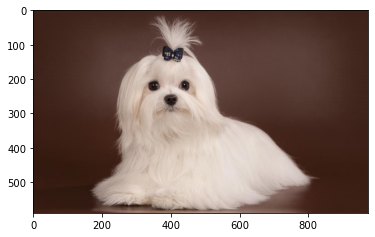

In [161]:
plt.imshow(imread(path_img_2))

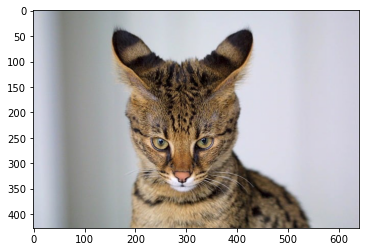

In [162]:
plt.imshow(imread(path_img_3))

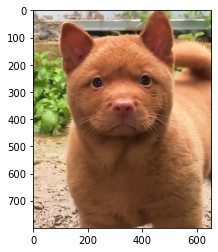

In [163]:
plt.imshow(imread(path_img_4))

In [164]:
def convert_img(path):
    img = image.load_img(path, target_size=input_shape[:2])
    return np.expand_dims(image.img_to_array(img),axis=0)

In [166]:
convert_img(path_img_1).shape

(1, 64, 64, 3)

In [168]:
make_pred(model, convert_img(path_img_1)) #Predicted wrong

"It's a dog"

In [169]:
make_pred(model, convert_img(path_img_2)) #Predicted correct

"It's a dog"

In [170]:
make_pred(model, convert_img(path_img_3)) #Predicted wrong

"It's a dog"

In [171]:
make_pred(model, convert_img(path_img_4)) #Predicted correct

"It's a dog"